In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("dataset/clean_bike_data.csv")

In [3]:
#Cleaned Dataset
data['DATETIME'] =  pd.to_datetime(data['DATETIME'], infer_datetime_format=True)
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00


In [4]:
#Adding Days of Week to the Dataset
data['daysOfWeek'] = data['DATETIME'].dt.dayofweek

#Grouping Weekend And Weekdays
weekend = data[data['daysOfWeek'] >= 5].reset_index(drop = True)
weekday = data[data['daysOfWeek'] < 5].reset_index(drop = True)

#Count the Total Weekend and Weekdays
weekend_tot = weekend.groupby(weekend["YEAR"]).size().reset_index(name="COUNT")
weekdays_tot = weekday.groupby(weekday["YEAR"]).size().reset_index(name="COUNT")

# filter daya bsed on Year and Days of week 
days_total = data.groupby([data['YEAR'],data['daysOfWeek']]).size().reset_index(name='COUNT')

In [5]:
#Grouping the Data based on days
monday = data[data['daysOfWeek'] == 0].reset_index(drop = True)
tuesday = data[data['daysOfWeek'] == 1].reset_index(drop = True)
wednesday = data[data['daysOfWeek'] == 2].reset_index(drop = True)
thrusday = data[data['daysOfWeek'] == 3].reset_index(drop = True)
friday =  data[data['daysOfWeek'] == 4].reset_index(drop = True)
saturday = data[data['daysOfWeek'] == 5].reset_index(drop = True)
sunday = data[data['daysOfWeek'] == 6].reset_index(drop = True)

In [6]:
monday = monday.groupby(monday["YEAR"]).size().reset_index(name="MONDAY")
tuesday = tuesday.groupby(tuesday["YEAR"]).size().reset_index(name="TUESDAY")
wednesday = wednesday.groupby(wednesday["YEAR"]).size().reset_index(name="WEDNESDAY")
thrusday = thrusday.groupby(thrusday["YEAR"]).size().reset_index(name="THRUSDAY")
friday = friday.groupby(friday["YEAR"]).size().reset_index(name="FRIDAY")
saturday = saturday.groupby(saturday["YEAR"]).size().reset_index(name="SATURDAY")
sunday = sunday.groupby(sunday["YEAR"]).size().reset_index(name="SUNDAY")

## Finding

From data 2003 - 2019, There is no significant difference of of the days compared

In [7]:
#count of days in total 
total_days = data.groupby('daysOfWeek').size().reset_index(name="COUNT")
total_days.head()

,daysOfWeek,COUNT
0,0,4517
1,1,4556
2,2,4454
3,3,4261
4,4,4607


The Most Frequent thief  happens on Friday

In [8]:
# The max thief happends on Friday 
highestDay = days_total[days_total['COUNT'].max() == days_total['COUNT']]
highestDay

,YEAR,daysOfWeek,COUNT
88,2015,4,480


# Ploting The Data

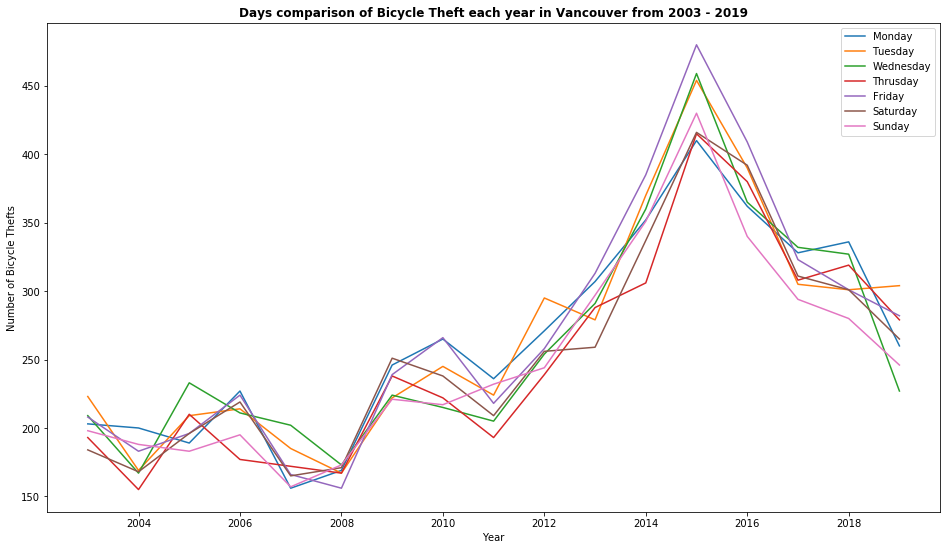

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(monday['YEAR'],monday['MONDAY'], label='Monday')
plt.plot(tuesday['YEAR'],tuesday['TUESDAY'], label='Tuesday')
plt.plot(wednesday['YEAR'],wednesday['WEDNESDAY'], label='Wednesday')
plt.plot(thrusday['YEAR'],thrusday['THRUSDAY'], label='Thrusday')
plt.plot(friday['YEAR'],friday['FRIDAY'], label='Friday')
plt.plot(saturday['YEAR'],saturday['SATURDAY'], label='Saturday')
plt.plot(sunday['YEAR'],sunday['SUNDAY'], label='Sunday')

plt.xlabel("Year")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Days comparison of Bicycle Theft each year in Vancouver from 2003 - 2019", fontweight="bold")
plt.legend()
plt.savefig('images/yearly_days_comparison.png')
plt.show()

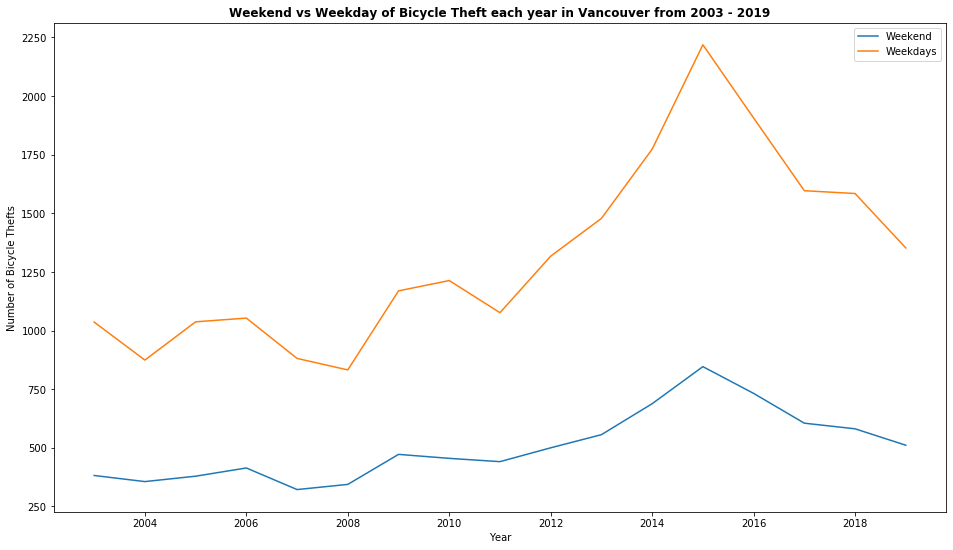

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(weekend_tot['YEAR'],weekend_tot['COUNT'], label='Weekend')
plt.plot(weekdays_tot['YEAR'],weekdays_tot['COUNT'], label='Weekdays')
plt.xlabel("Year")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Weekend vs Weekday of Bicycle Theft each year in Vancouver from 2003 - 2019",fontweight="bold")
plt.legend()
plt.savefig('images/yearly_weekdays_comparison.png')
plt.show()

# Statistical Test

In [11]:
 # Check if these two graphs are normal?
# They are both normal
p_value = stats.normaltest(weekend_tot["COUNT"]).pvalue
print("Weekend P_value: ", p_value)

p_value = stats.normaltest(weekdays_tot["COUNT"]).pvalue
print("Weekdays P_value: ", p_value)

# The mean between weekdays and weekend not the same
ttest = stats.ttest_ind(weekdays_tot["COUNT"], weekend_tot["COUNT"])
print(ttest.pvalue)


Weekend P_value:  0.2351980618200472
Weekdays P_value:  0.3032358306078374
4.3307672033093125e-09


/home/antoniuskev/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [12]:
#ANOVA TEST  DAYS OF WEEK
#from anova test we can say the means between these group are similar
anova = stats.f_oneway(monday['MONDAY'],tuesday['TUESDAY'], wednesday['WEDNESDAY'], thrusday['THRUSDAY'], friday['FRIDAY'], saturday['SATURDAY'], sunday['SUNDAY'])
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=0.1988208459869164, pvalue=0.9765044822782675)
0.9765044822782675


In [13]:
weekend_season = weekend[['YEAR', 'MONTH']]
weekend_season1 = weekend_season.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter'])
weekend_season = weekend_season1.groupby(weekend_season1['MONTH']).size().reset_index(name="COUNT")
weekend_season

,MONTH,COUNT,WEEKENDS
0,Fall,2091,1
1,Spring,1935,1
2,Summer,3644,1
3,Winter,914,1


In [14]:
weekday_season = weekday[['YEAR', 'MONTH']]
weekday_season1 = weekday_season.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter'])
weekday_season = weekday_season1.groupby(weekday_season1['MONTH']).size().reset_index(name="COUNT")
weekday_season

,MONTH,COUNT
0,Fall,5780
1,Spring,4805
2,Summer,9368
3,Winter,2442


In [15]:
# Chi2 Test meaning, The days does not have any effect on the number of 
# theif occurs
contingency = [weekday_season['COUNT'], weekday_season['COUNT']]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)
print(expected)

1.0
[[5780. 4805. 9368. 2442.]
 [5780. 4805. 9368. 2442.]]
